In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [28]:
data_path = r'C:\FlutterCode\Machine learning\zomato.csv'
df = pd.read_csv(data_path, nrows=5000)

print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (5000, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          5000 non-null   object
 1   address                      5000 non-null   object
 2   name                         5000 non-null   object
 3   online_order                 5000 non-null   object
 4   book_table                   5000 non-null   object
 5   rate                         4314 non-null   object
 6   votes                        5000 non-null   int64 
 7   phone                        4916 non-null   object
 8   location                     4999 non-null   object
 9   rest_type                    4976 non-null   object
 10  dish_liked                   2077 non-null   object
 11  cuisines                     4995 non-null   object
 12  approx_cost(for two people)  4989 non-null   object
 13  reviews_list                 5000

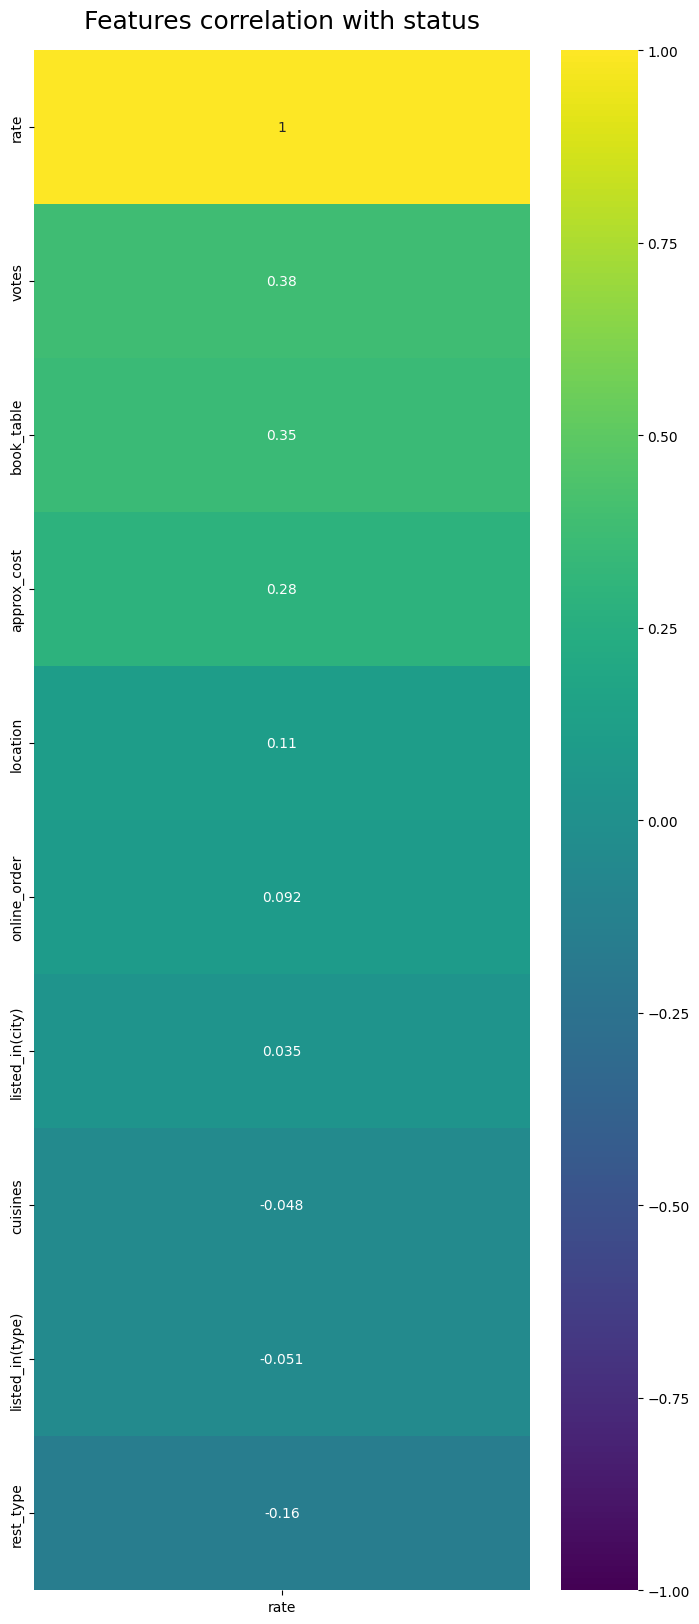

In [91]:
plt.figure(figsize = (8, 20))
heatmap = sns.heatmap(df.corr()[['rate']].sort_values(by='rate',ascending=False), vmin=-1, vmax=1, annot=True,cmap='viridis')
heatmap.set_title('Features correlation with status', fontdict={'fontsize':18}, pad=16)
plt.show()

In [30]:
columns_to_drop = ['url', 'address', 'name', 'phone', 'dish_liked', 'reviews_list', 'menu_item']
df = df.drop(columns=columns_to_drop, axis=1)

In [31]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['rate'] = pd.to_numeric(df['rate'].str.split('/').str[0], errors='coerce')
df['rate'] = imputer.fit_transform(df[['rate']])



In [32]:
df['approx_cost'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
df['approx_cost'] = df['approx_cost'].astype(float)
df = df.drop(columns=['approx_cost(for two people)'])

imputer = SimpleImputer(strategy='mean')
df['approx_cost'] = imputer.fit_transform(df[['approx_cost']])

In [33]:
# Handle categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [34]:
X = df.drop(columns=['rate'])
y = df['rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.044626436549027836


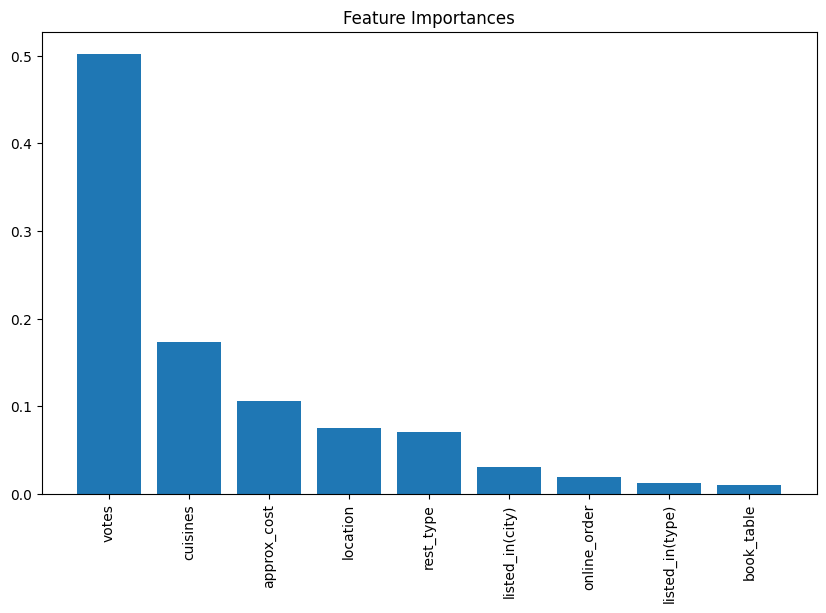

In [42]:
# Feature importances
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.title("Feature Importances")
plt.show()


In [63]:
X_test.head()

,online_order,book_table,votes,location,rest_type,cuisines,listed_in(type),listed_in(city),approx_cost
1501,1,0,59,15,7,114,2,1,400.0
2586,1,0,210,17,9,386,2,2,400.0
2653,1,1,784,0,17,364,2,2,800.0
1055,1,0,381,0,50,42,2,1,250.0
705,0,0,130,1,50,839,4,0,200.0


In [81]:
X_testing = X_test.head(1)
y_predict = model.predict(X_testing)
print(y_predict)

[3.683]
